# About Dataset


# Context
This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I get this data from https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-resultsin. This Data is scraped by rgriffin, a fellow Data Scientist and Kaggle user.

Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.

# Content
1. ID - Unique number for each athlete
2. Name - Athlete's name
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or NA

# Inspiration
This dataset provides an opportunity to ask questions about how the Olympics have evolved over time, including questions about the participation and performance of women, different nations, and different sports and events.

# Importing libraries

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# Getting Dataset

In [153]:
data = pd.read_csv('athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [154]:
data1 = pd.read_csv('noc_regions.csv')
data1.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [155]:
data = data.merge(data1, on = 'NOC', how = 'left')

In [156]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [157]:
data.shape

(271116, 17)

In [158]:
data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

In [159]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [160]:
data.info

<bound method DataFrame.info of             ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summe

In [161]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Potential Questions for EDA in mind rn
1. Medal Telly by country(region in this dataset)
2. Most medals by an athelete
3. Most Gold, Silver and Bronze medal by a country.
4. Performance of Female Atheletes countrywise.
5. Perticular Country performance over the years.

In [246]:
# top 30 countries with most medals in history of olympics
data.groupby('region')['Medal'].count().sort_values(ascending = False)[:30]

region
USA               5637
Russia            3947
Germany           3756
UK                2068
France            1777
Italy             1637
Sweden            1536
Canada            1352
Australia         1349
Hungary           1135
Netherlands       1040
Norway            1033
China              993
Japan              913
Finland            900
Switzerland        691
Romania            653
Czech Republic     644
South Korea        638
Denmark            597
Poland             565
Serbia             539
Spain              489
Brazil             475
Belgium            468
Austria            450
Cuba               409
Bulgaria           342
Argentina          274
Greece             255
Name: Medal, dtype: int64

<AxesSubplot:xlabel='region'>

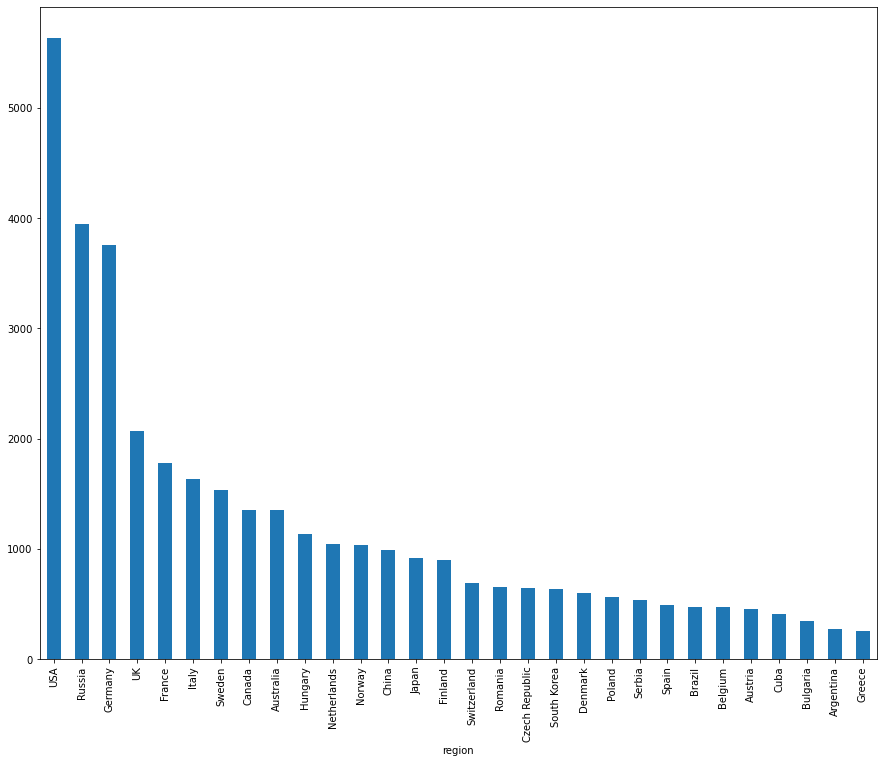

In [162]:
data.groupby('region')['Medal'].count().sort_values(ascending = False)[:30].plot(figsize = (15,12), kind = 'bar')

<AxesSubplot:xlabel='region,Medal'>

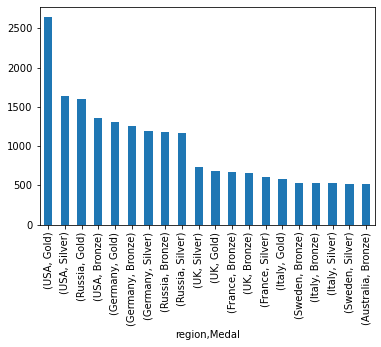

In [163]:
data.groupby('region')['Medal'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'bar')

In [164]:
country = data.groupby('region')

In [165]:
usa = country.get_group('USA')

In [166]:
usa

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270850,135458,Rami Zur,M,27.0,175.0,77.0,United States,USA,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN,USA,NaN
270851,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 500 metres",NaN,USA,NaN
270852,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",NaN,USA,NaN
271044,135543,"Victor Andrew ""Vic"" Zwolak",M,25.0,175.0,64.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN,USA,NaN


In [248]:
# number of medals by USA in history.
usa['Medal'].value_counts()

Gold      2638
Silver    1641
Bronze    1358
Name: Medal, dtype: int64

In [249]:
ind = country.get_group('India')

In [250]:
# number of medals by India in history.
ind['Medal'].value_counts()

Gold      138
Bronze     40
Silver     19
Name: Medal, dtype: int64

In [170]:
medal = data.groupby('Medal')

In [171]:
gold = medal.get_group('Gold')

In [172]:
gold_country = gold['region'].value_counts().sort_values(ascending = False)

In [173]:
silver = medal.get_group('Silver')

In [174]:
silver_country = silver.region.value_counts().sort_values(ascending = False)

In [175]:
bronze = medal.get_group('Bronze')

In [176]:
bronze_country = bronze.region.value_counts().sort_values(ascending = False)

In [251]:
# number of gold medals by countries
gold_country.head()

USA        2638
Russia     1599
Germany    1301
UK          678
Italy       575
Name: region, dtype: int64

In [252]:
# number of silver medals by countries
silver_country.head()

USA        1641
Germany    1195
Russia     1170
UK          739
France      610
Name: region, dtype: int64

In [253]:
# number of bronze medals by countries
bronze_country.head()

USA        1358
Germany    1260
Russia     1178
France      666
UK          651
Name: region, dtype: int64

<AxesSubplot:>

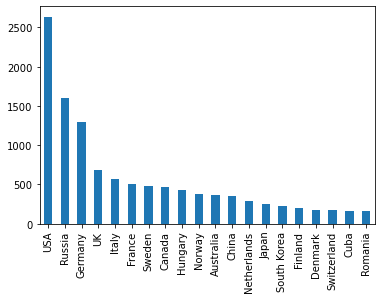

In [254]:
# top 20 countries with most gold medals
gold_country[:20].plot(kind = 'bar')

<AxesSubplot:>

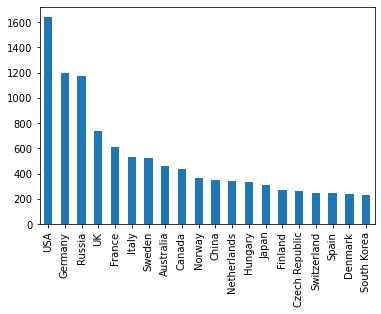

In [255]:
# top 20 countries with most silver medals
silver_country[:20].plot(kind = 'bar')

<AxesSubplot:>

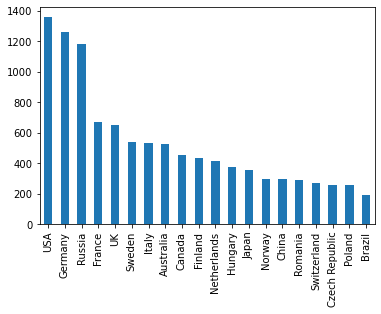

In [256]:
# top 20 countries with most bronze medals
bronze_country[:20].plot(kind = 'bar')

In [183]:
data.groupby('Name')['Medal'].value_counts().sort_values(ascending = False)

Name                                Medal 
Michael Fred Phelps, II             Gold      23
Raymond Clarence "Ray" Ewry         Gold      10
Larysa Semenivna Latynina (Diriy-)  Gold       9
Mark Andrew Spitz                   Gold       9
Paavo Johannes Nurmi                Gold       9
                                              ..
Henri Baur                          Silver     1
Henri Antoine Padou, Sr.            Gold       1
                                    Bronze     1
Henri Andr Laperrire                Gold       1
ystein Pettersen                    Gold       1
Name: Medal, Length: 33710, dtype: int64

In [184]:
most_gold_medals_player = gold.Name.value_counts().sort_values(ascending = False)

In [257]:
# most gold medals by a single athelete 
most_gold_medals_player.head()

Michael Fred Phelps, II           23
Raymond Clarence "Ray" Ewry       10
Mark Andrew Spitz                  9
Frederick Carlton "Carl" Lewis     9
Paavo Johannes Nurmi               9
Name: Name, dtype: int64

<AxesSubplot:>

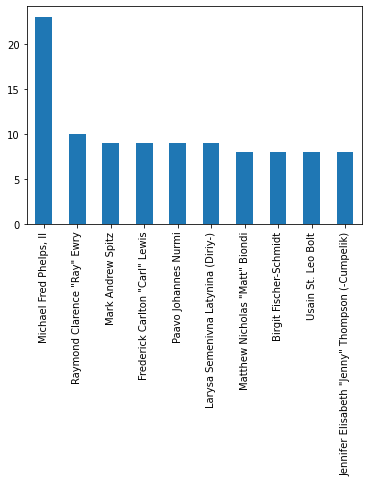

In [186]:
most_gold_medals_player[:10].plot(kind = 'bar')

In [258]:
# most silver medals by an athelete
most_silver_medals_player = silver.Name.value_counts().sort_values(ascending = False)

In [259]:
most_silver_medals_player.head()

Mikhail Yakovlevich Voronin        6
Yang Yang                          6
Aleksandr Vladimirovich Popov      6
Shirley Frances Babashoff          6
Aleksandr Nikolayevich Dityatin    6
Name: Name, dtype: int64

In [260]:
most_bronze_medals_player = bronze.Name.value_counts().sort_values(ascending = False)

In [261]:
most_bronze_medals_player.head()

Heikki Ilmari Savolainen    6
Aleksey Yuryevich Nemov     6
Franziska van Almsick       6
Harri Tapani Kirvesniemi    6
Merlene Joyce Ottey-Page    6
Name: Name, dtype: int64

In [191]:
ind.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [192]:
ind.duplicated().any()

False

In [193]:
ind.Medal.value_counts()

Gold      138
Bronze     40
Silver     19
Name: Medal, dtype: int64

In [194]:
ind.groupby(['Sport'])['Medal'].value_counts()

Sport          Medal 
Alpinism       Gold        7
Athletics      Silver      2
Badminton      Bronze      1
               Silver      1
Boxing         Bronze      2
Hockey         Gold      130
               Bronze     30
               Silver     13
Shooting       Silver      2
               Bronze      1
               Gold        1
Tennis         Bronze      1
Weightlifting  Bronze      1
Wrestling      Bronze      4
               Silver      1
Name: Medal, dtype: int64

In [262]:
# sports with most number of players/participants
data['Sport'].value_counts()

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

In [263]:
participants=data.groupby('Year')['Name'].count().reset_index()
participants.head()

,Year,Name
0,1896,380
1,1900,1936
2,1904,1301
3,1906,1733
4,1908,3101


In [264]:
reg_medal=data.groupby(['Season','Medal']).size().reset_index()
reg_medal

,Season,Medal,0
0,Summer,Bronze,11409
1,Summer,Gold,11459
2,Summer,Silver,11220
3,Winter,Bronze,1886
4,Winter,Gold,1913
5,Winter,Silver,1896


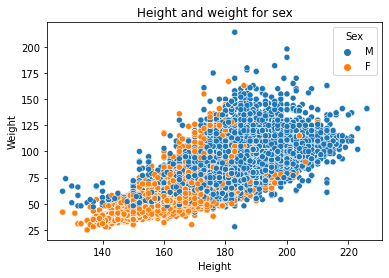

In [199]:
sns.scatterplot(x='Height',y='Weight',hue='Sex',data=data)
plt.title('Height and weight for sex')
plt.show()

let's see women medals per years

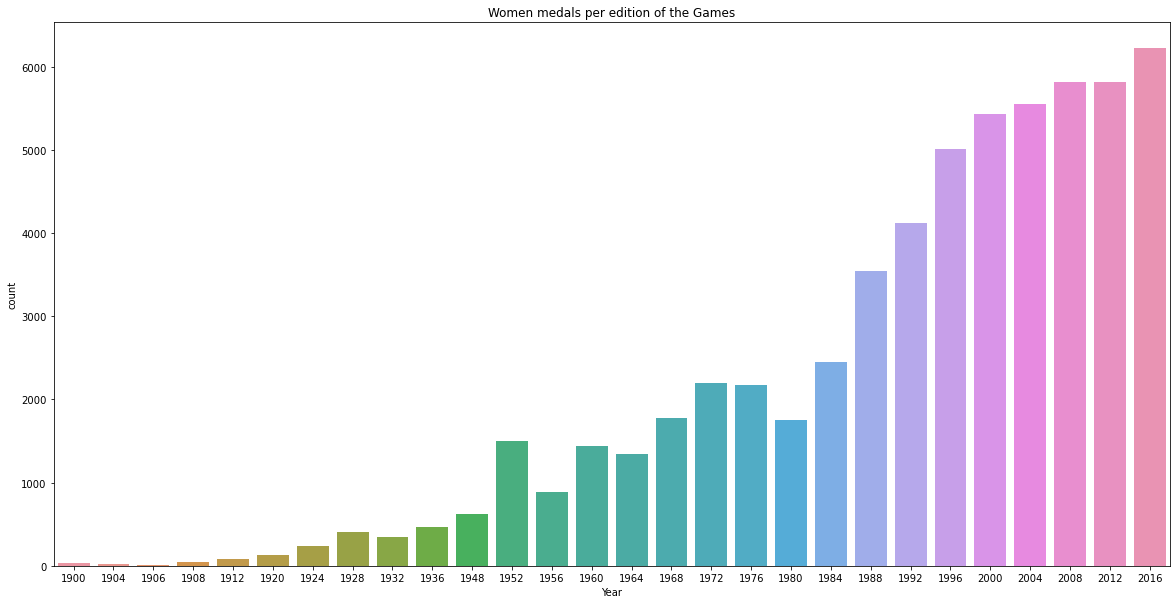

In [200]:
womenolympics = data[(data.Sex == 'F') &
                         (data.Season == 'Summer')]
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenolympics)
plt.title('Women medals per edition of the Games')
plt.show()

In [202]:
summer_medals=data.groupby(['region', 'Medal']).size().reset_index()
summer_medals.columns=['region', 'Medal', 'count']

In [203]:
summer_medals.pivot('region', 'Medal', 'count')

Medal,Bronze,Gold,Silver
region,,,
Afghanistan,2.0,NaN,NaN
Algeria,8.0,5.0,4.0
Argentina,91.0,91.0,92.0
Armenia,9.0,2.0,5.0
Australia,522.0,368.0,459.0
...,...,...,...
Venezuela,10.0,2.0,3.0
Vietnam,NaN,1.0,3.0
"Virgin Islands, US",NaN,NaN,1.0


In [204]:
summer_medals.pivot('region', 'Medal', 'count').fillna(0)

Medal,Bronze,Gold,Silver
region,,,
Afghanistan,2.0,0.0,0.0
Algeria,8.0,5.0,4.0
Argentina,91.0,91.0,92.0
Armenia,9.0,2.0,5.0
Australia,522.0,368.0,459.0
...,...,...,...
Venezuela,10.0,2.0,3.0
Vietnam,0.0,1.0,3.0
"Virgin Islands, US",0.0,0.0,1.0


In [205]:
summer_medals_20=summer_medals.pivot('region', 'Medal', 'count').fillna(0).sort_values(['Gold'], ascending=False).head(20)

Medals by Country

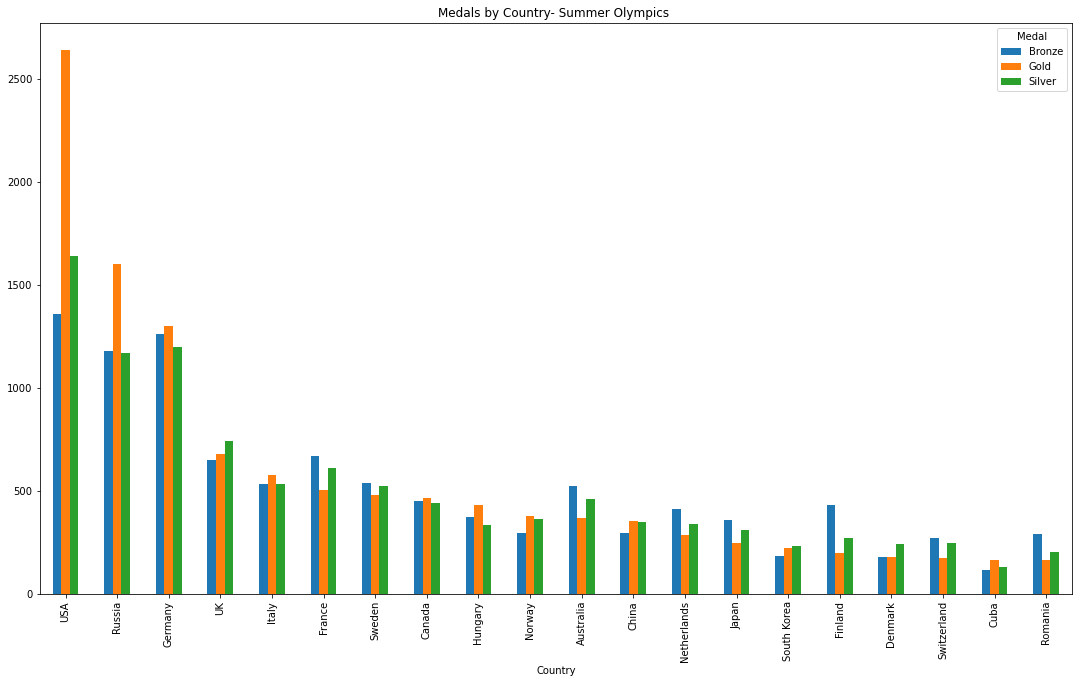

In [206]:
summer_medals_20.plot(kind='bar')
plt.xlabel('Country')
plt.title('Medals by Country- Summer Olympics ')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()


In [207]:
winter_medals=data[data['Season']=='Winter'].groupby(['region', 'Medal']).size().reset_index()

In [208]:
winter_medals.head()

,region,Medal,0
0,Australia,Bronze,7
1,Australia,Gold,6
2,Australia,Silver,3
3,Austria,Bronze,103
4,Austria,Gold,79


In [209]:
winter_medals.columns=['region', 'Medal', 'count']

In [210]:
winter_medals_20=winter_medals.pivot(index='region', columns='Medal', values='count').sort_values('Gold', 
                                                                                                  ascending=False).head(20)

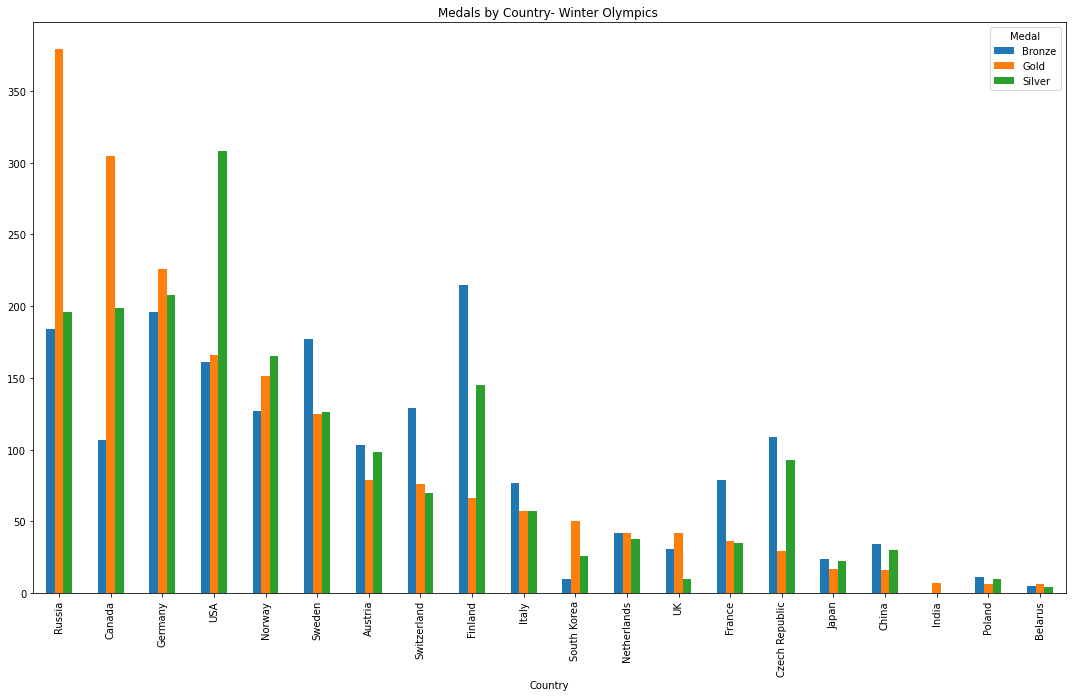

In [211]:
winter_medals_20.plot(kind='bar')
plt.xlabel('Country')
plt.title('Medals by Country- Winter Olympics ')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()


In [212]:
year=data['Year'].value_counts()

Number of Participants per year

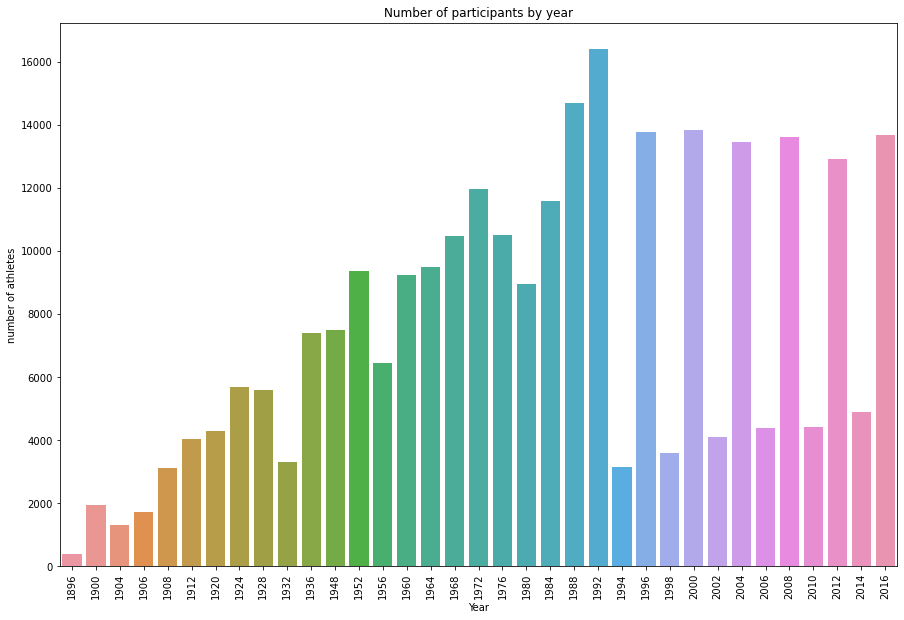

In [213]:
plt.figure(figsize=(15,10))
sns.barplot(x=year.index, y=year.values)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("number of athletes")
plt.title("Number of participants by year")
plt.show()

In [214]:
year_sex_medal=data.groupby(['Year', 'Sex'])['Medal'].count().reset_index()

In [215]:
year_sex_medal.head()

,Year,Sex,Medal
0,1896,M,143
1,1900,F,13
2,1900,M,591
3,1904,F,10
4,1904,M,476


In [216]:
year_sex_medal_pivot=year_sex_medal.pivot(index='Year', columns='Sex', values='Medal').fillna(0)

In [217]:
year_sex_medal_pivot.head()

Sex,F,M
Year,,
1896,0.0,143.0
1900,13.0,591.0
1904,10.0,476.0
1906,6.0,452.0
1908,16.0,815.0


Number of participants by year and gender

<Figure size 1440x720 with 0 Axes>

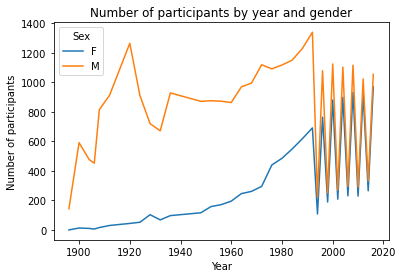

In [218]:
plt.figure(figsize=(20, 10))
fig=plt.gcf()
year_sex_medal_pivot.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of participants')
plt.title('Number of participants by year and gender')
plt.show()


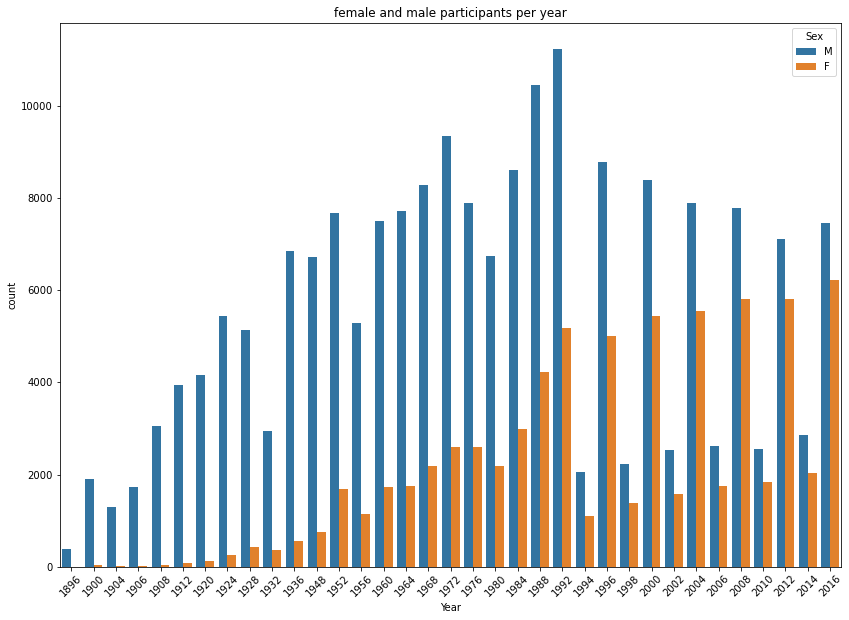

In [220]:
plt.figure(figsize=(14,10))
sns.countplot(x='Year', hue='Sex', data=data)
plt.xticks(rotation=45)
plt.title('female and male participants per year')
plt.show()


In [225]:
sport_summer=data[data['Season']=='Summer']['Sport'].value_counts().sort_values(ascending=False).head(20)

In [226]:
sport=data['Sport'].value_counts()[:5]
print(sport)

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64


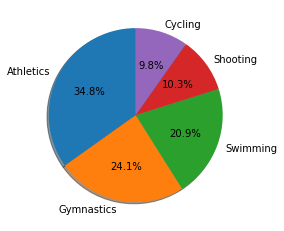

In [227]:
labels=sport.index
sizes=sport.values
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,startangle=90)
plt.show()

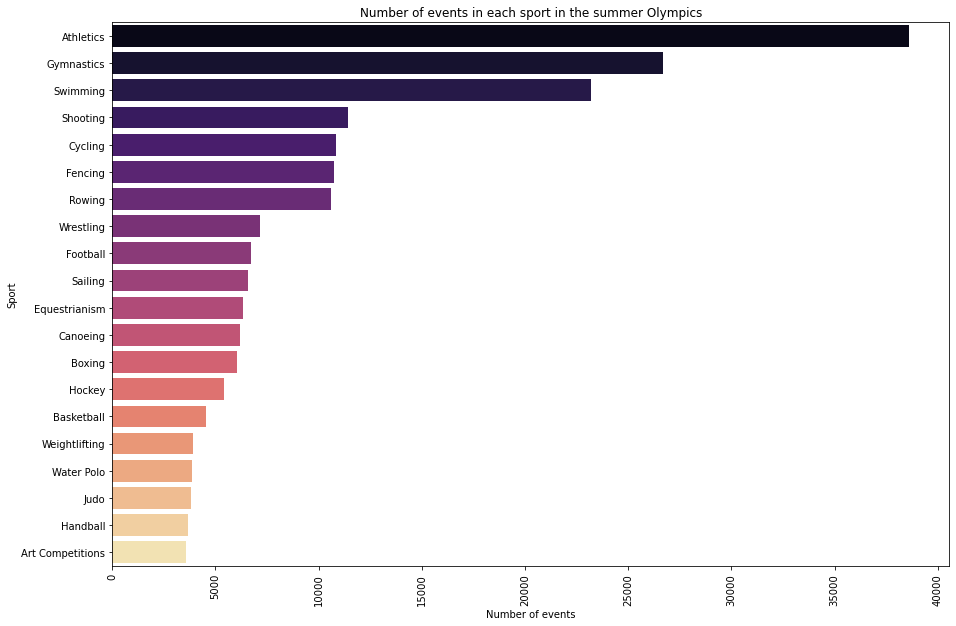

In [228]:
plt.figure(figsize=(15,10))
sns.barplot(y=sport_summer.index, x=sport_summer.values, palette='magma')
plt.xlabel('Number of events')
plt.ylabel('Sport')
plt.xticks(rotation=90)
plt.title("Number of events in each sport in the summer Olympics")
plt.show()

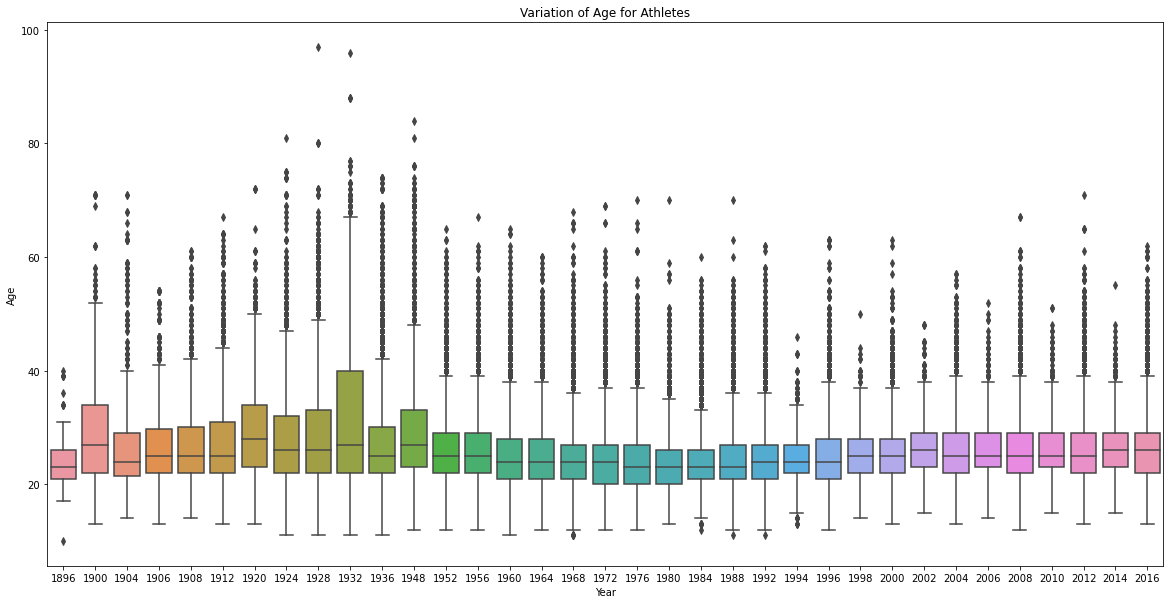

In [229]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Year', y='Age', data=data)
plt.title('Variation of Age for Athletes')
plt.show()

In [230]:
sport_winter=data[data['Season']=='Winter']['Sport'].value_counts().sort_values(ascending=False)

In [231]:
sport_winter.head()

Cross Country Skiing    9133
Alpine Skiing           8829
Speed Skating           5613
Ice Hockey              5456
Biathlon                4893
Name: Sport, dtype: int64

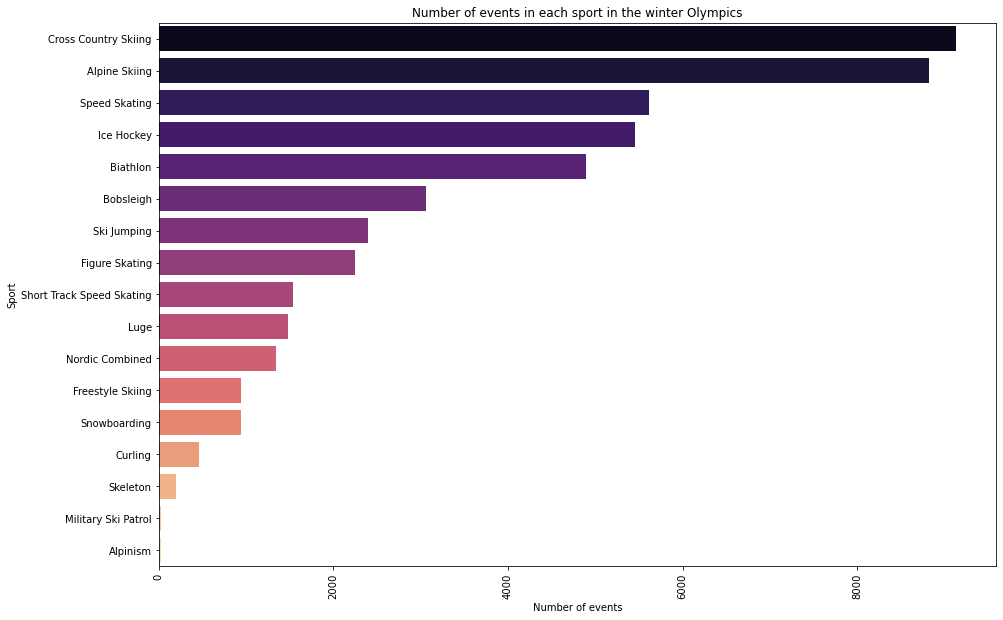

In [232]:
plt.figure(figsize=(15,10))
sns.barplot(y=sport_winter.head(20).index, x=sport_winter.head(20).values, palette='magma')
plt.xlabel('Number of events')
plt.ylabel('Sport')
plt.xticks(rotation=90)
plt.title("Number of events in each sport in the winter Olympics")
plt.show()

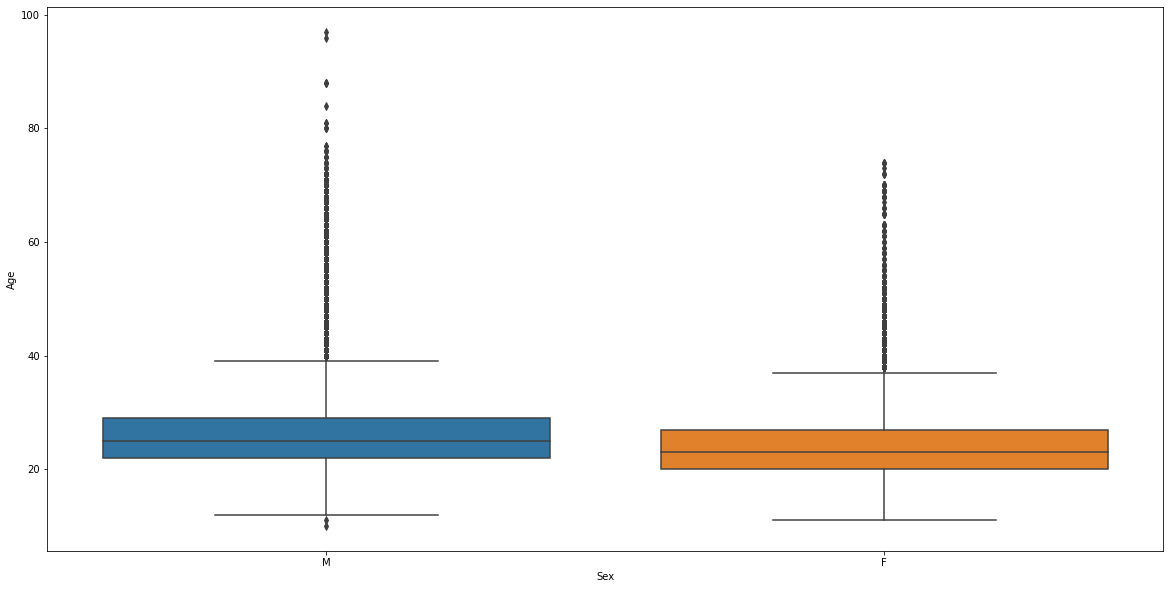

In [233]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Sex', y='Age', data=data)
plt.show()

In [234]:
data_set=data[data['Season']=='Winter'].groupby('Sport')['ID'].count().reset_index()

In [235]:
data_set.head()

,Sport,ID
0,Alpine Skiing,8829
1,Alpinism,21
2,Biathlon,4893
3,Bobsleigh,3058
4,Cross Country Skiing,9133


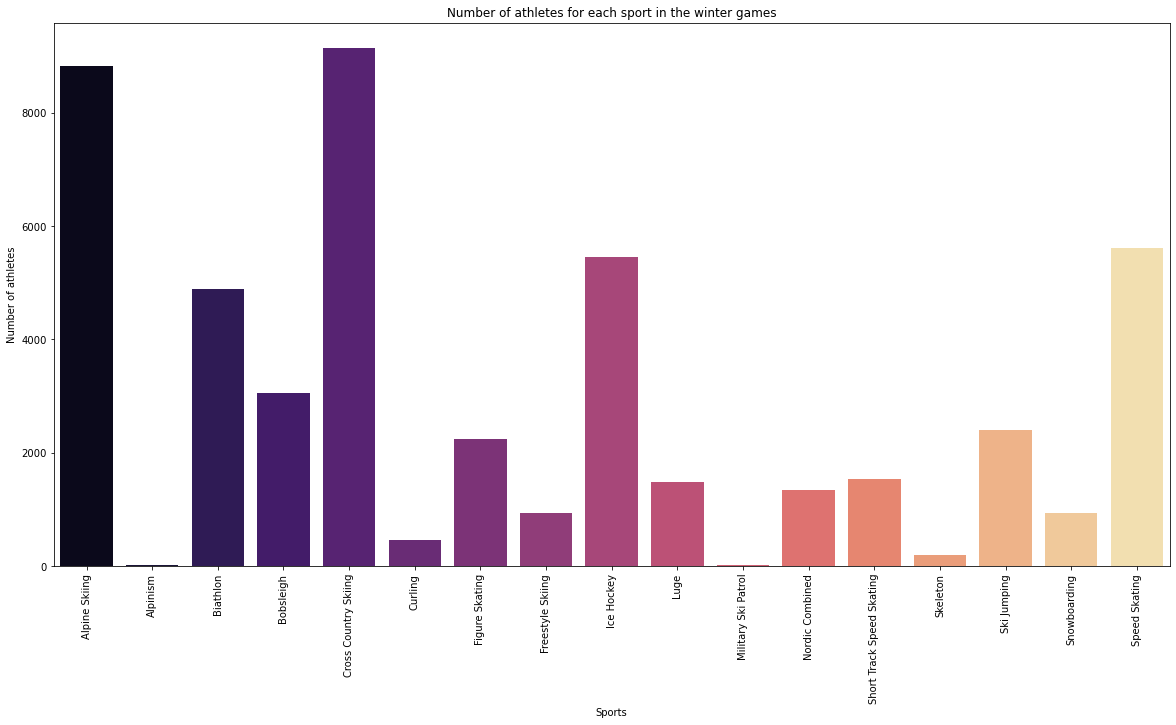

In [237]:
plt.figure(figsize=(20,10))
sns.barplot(x='Sport', y='ID', data=data_set,palette='magma')
plt.title('Number of athletes for each sport in the winter games')
plt.xlabel('Sports')
plt.ylabel('Number of athletes')
plt.xticks(rotation=90)
plt.show()

An indication of how many countries attend each year

In [240]:
df=data.groupby('Year')['region'].nunique().reset_index()

In [241]:
df.head()

,Year,region
0,1896,12
1,1900,31
2,1904,14
3,1906,20
4,1908,22


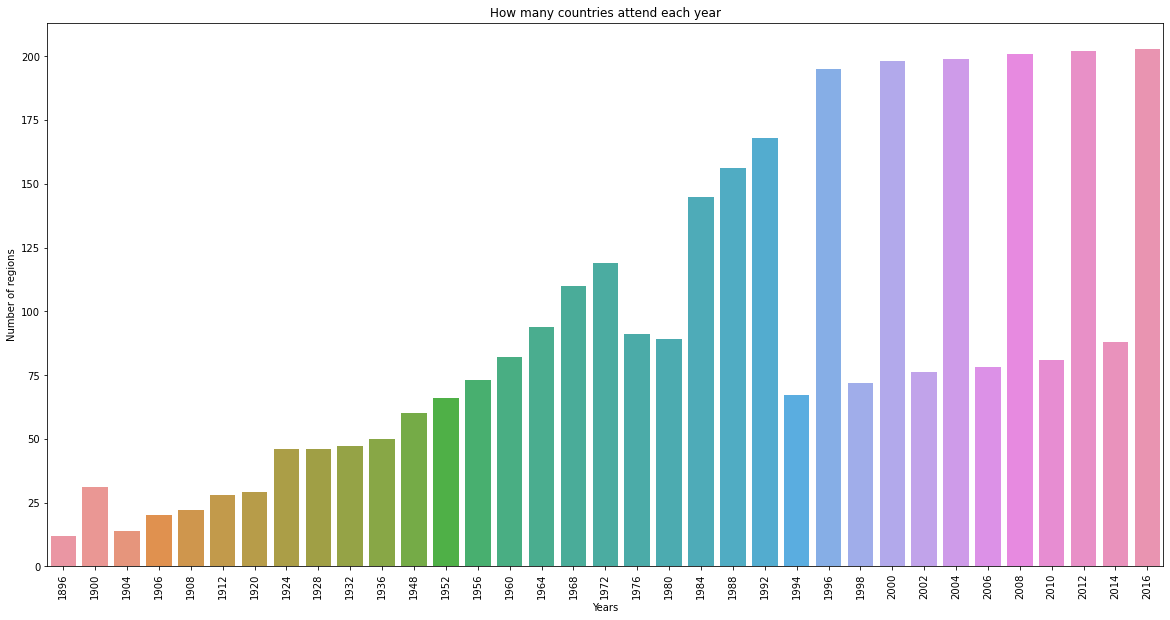

In [242]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='region', data=df)
plt.title('How many countries attend each year')
plt.xlabel('Years')
plt.ylabel('Number of regions')
plt.xticks(rotation=90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


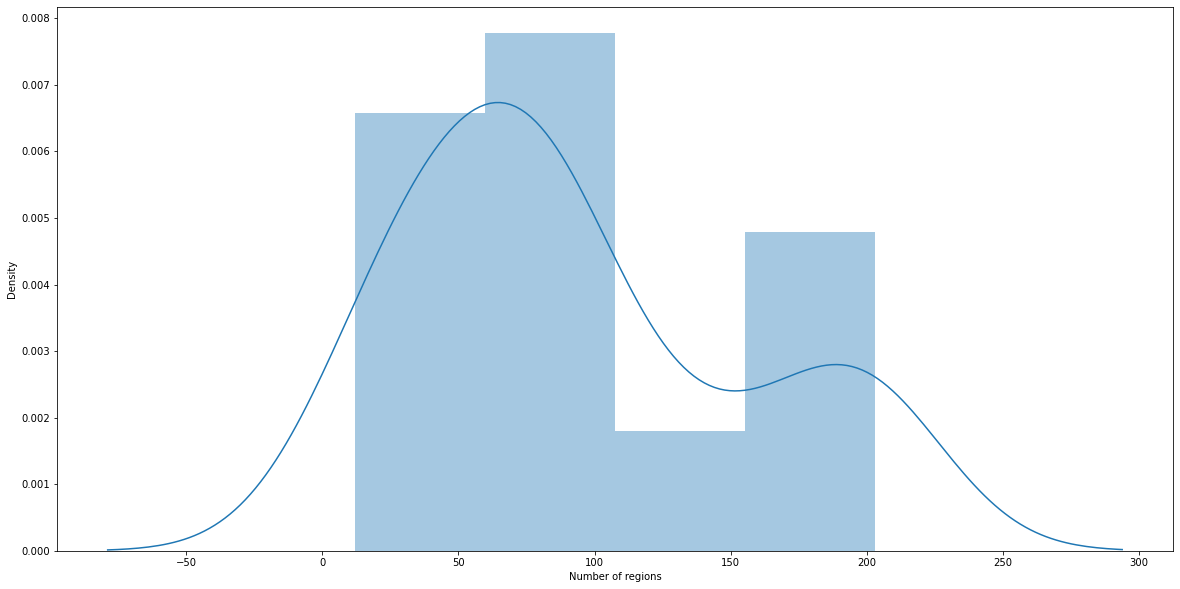

In [243]:
plt.figure(figsize=(20,10))
sns.distplot(df['region'])
plt.xlabel('Number of regions')
plt.show()

In [244]:
data.to_csv('Olympics_dataset.csv')

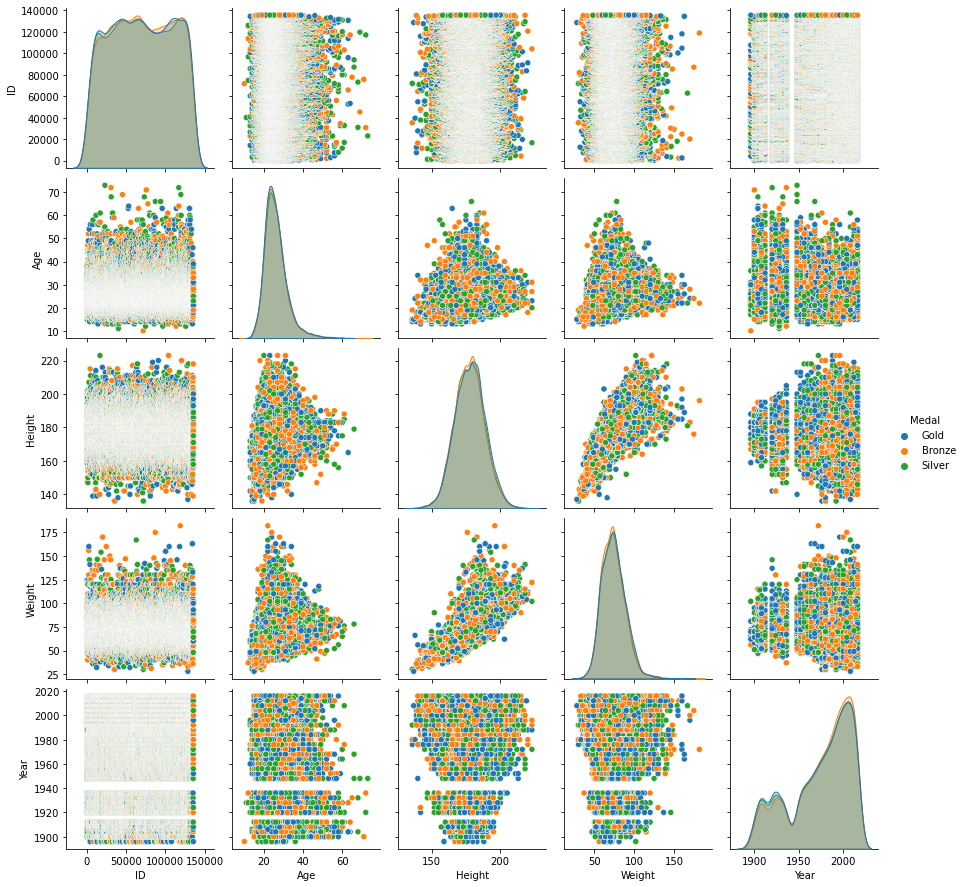

In [266]:
sns.pairplot(data, hue = 'Medal')